dr. Janko Slavič (www.ladisk.si, janko.slavic@fs.uni-lj.si)

In [1]:
from pyTrigger import RingBuffer2D, pyTrigger
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Showcase of the package pyTrigger

Jan 2018, dr. J. Slavič (www.ladisk.si, janko.slavic@fs.uni-lj.si)

Lets prepare some data (impuls):

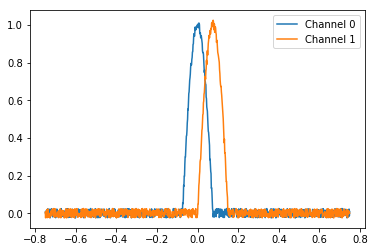

In [2]:
T = 1.5
N = 1000
w = 0.1
t, dt = np.linspace(-T/2, T/2, N, endpoint=False, retstep=True)
x = np.cos(2*np.pi*t/(2*w*T))
x[np.logical_or(-w*T*0.5>t, t>w*T*0.5)] = 0.
np.random.seed(0)
data = np.array([x + 0.05*(np.random.rand(N)-0.5),
                 np.roll(x,50) + 0.05*(np.random.rand(N)-0.5)]).T
plt.plot(t,data[:,0], label='Channel 0')
plt.plot(t,data[:,1], label='Channel 1')
plt.legend();

## Big chunk example

Prepare the trigger object:

In [16]:
pt = pyTrigger(rows=500, channels=2, trigger_channel=0, trigger_level=0.5,
               trigger_type='up', presamples=50)

In [17]:
pt.add_data(data)

True

In [18]:
triggered_data = pt.get_data()

In [19]:
len(triggered_data)

500

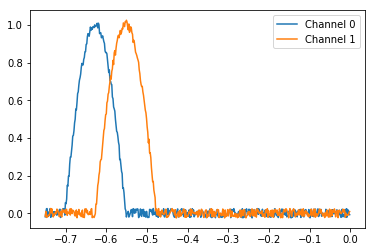

In [20]:
plt.plot(t[:len(triggered_data)], triggered_data[:,0], label='Channel 0')
plt.plot(t[:len(triggered_data)], triggered_data[:,1], label='Channel 1')
plt.legend();

## Streaming example

In [26]:
pt = pyTrigger(rows=500, channels=2, trigger_channel=0, trigger_level=0.5,
               trigger_type='up', presamples=50)
for d in data.reshape((-1, 100, 2)):
    pt.add_data(d)
    print(f'Triggering started: {pt.triggered}, # of rows to acquire: {pt.rows_left}')
pt.finished

Triggering started: False, # of rows to acquire: 500
Triggering started: False, # of rows to acquire: 500
Triggering started: False, # of rows to acquire: 500
Triggering started: False, # of rows to acquire: 500
Triggering started: True, # of rows to acquire: 418
Triggering started: True, # of rows to acquire: 318
Triggering started: True, # of rows to acquire: 218
Triggering started: True, # of rows to acquire: 118
Triggering started: True, # of rows to acquire: 18
Triggering started: True, # of rows to acquire: 0


True

In [27]:
triggered_from_stream = pt.get_data()

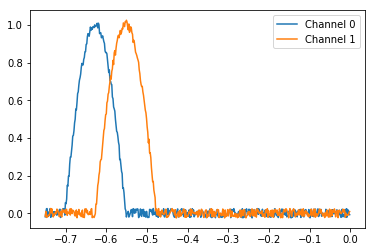

In [28]:
plt.plot(t[:len(triggered_from_stream)], triggered_from_stream[:,0], label='Channel 0')
plt.plot(t[:len(triggered_from_stream)], triggered_from_stream[:,1], label='Channel 1')
plt.legend();